
# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I selected the TMDb movie datasetto investigate.The data contains information that are provided from The Movie Database (TMDb). It collects 10k+ movies,user ratings and revenue data.

### Qeuestions

Research Question 1- Which genres are most popular in the movies? 

Research Question 2- Who is the actor that has most movies ?

Research Question 3- What is the company that produced  most movies?

Research Question 4- What is the top keyword?

Research Question 5- Which year has the biggest number of movies?

Research Question 6- Which director directed most films?

<a id='wrangling'></a>
## Data Wrangling

### General Properties

Let's take a glimpse at TMDb movie data csv file

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
% matplotlib inline 

In [2]:
# Loading the data and having a look at the first few lines
df = pd.read_csv('tmdb-movies.csv')
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [3]:
print('Dataframe contains {} rows and {} columns'.format(df.shape[0],df.shape[1]))

Dataframe contains 10866 rows and 21 columns


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


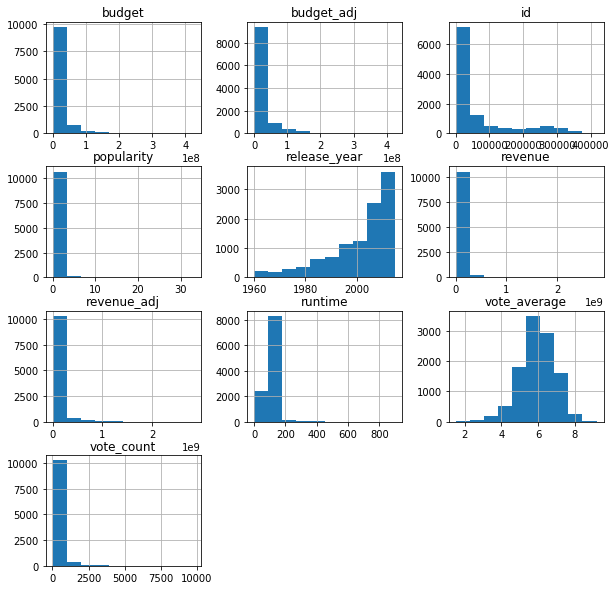

In [5]:
df.hist(figsize=(10,10));

Let's take a look at some zero budget and revenue data.

In [6]:
#query zero budget data
df_budget_zero = df.query('budget == 0')
df_budget_zero.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,280996,tt3168230,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,http://www.mrholmesfilm.com/,Bill Condon,The man behind the myth,...,"The story is set in 1947, following a long-ret...",103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/15,425,6.4,2015,0.0,2.700677e+07
36,339527,tt1291570,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,NaN,Afonso Poyart,"A serial killer who can see your future, a psy...",...,"A psychic doctor, John Clancy, works with an F...",101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,9/3/15,474,6.2,2015,0.0,2.056620e+07
72,284289,tt2911668,2.272044,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,NaN,Jean-Baptiste LÃ©onetti,NaN,...,A high-rolling corporate shark and his impover...,95,Thriller,Furthur Films,4/17/15,81,5.5,2015,0.0,4.222338e+04


In [7]:
#query the zero revenue data
df_revenue_zero = df.query('revenue == 0')
df_revenue_zero.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
48,265208,tt2231253,2.932340,30000000,0,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,NaN,Simon West,Never bet against a man with a killer hand.,...,When a Las Vegas bodyguard with lethal skills ...,92,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,1/14/15,481,5.3,2015,2.759999e+07,0.0
67,334074,tt3247714,2.331636,20000000,0,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,http://survivormovie.com/,James McTeigue,His Next Target is Now Hunting Him,...,A Foreign Service Officer in London tries to p...,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,5/21/15,280,5.4,2015,1.839999e+07,0.0
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,...,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.000000e+00,0.0


 I count the number of the zero values in the two columns to decide whether to drop them out or set them as null values.

In [8]:
#count zero values in budget data using groupby
df.groupby('budget',as_index=False).count()['id'].head(2) 


0    5696
1       4
Name: id, dtype: int64

In [9]:
#count zero values in revenue data using groupby
df.groupby('revenue',as_index=False).count()['id'].head(2)



0    6016
1       2
Name: id, dtype: int64

In [10]:
#count zero values in runtime data using groupby
df_runtime_0count =  df.groupby('runtime').count()['id']
df_runtime_0count.head(2)

runtime
0    31
2     5
Name: id, dtype: int64

budget column contains 5696 rows and revenue column contains 6016 rows in zero values, so I also decide to keep these rows and replace zero values with null values.

runtime column has a small number of zero value rows , so I decide to drop them.


### Data Cleaning 

 let's drop unncessary columns

In [11]:
df.drop(['imdb_id', 'homepage', 'overview','tagline','release_date','budget_adj','revenue_adj'],axis=1 ,inplace=True)

In [12]:
#drop duplicated rows
df.drop_duplicates(inplace=True)

In [13]:
# count the rows
df.shape

(10865, 14)

In [14]:
#drop the null values in cast, director, genres columns
#source = http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html
dp_cl=['cast','director', 'genres','runtime']
df.dropna(subset=dp_cl, how='any', inplace=True)

In [15]:
# check if nulls are dropped.
df.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                       0
director                   0
keywords                1425
runtime                    0
genres                     0
production_companies     959
vote_count                 0
vote_average               0
release_year               0
dtype: int64

### Replacing zero values with null values in the budget and revenue column.

In [16]:
df['revenue'].replace(0, np.NAN, inplace=True)
df['budget'].replace(0, np.NAN, inplace=True)

In [17]:
# ckeck if nulls are added in budget and revenue columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 14 columns):
id                      10731 non-null int64
popularity              10731 non-null float64
budget                  5153 non-null float64
revenue                 4843 non-null float64
original_title          10731 non-null object
cast                    10731 non-null object
director                10731 non-null object
keywords                9306 non-null object
runtime                 10731 non-null int64
genres                  10731 non-null object
production_companies    9772 non-null object
vote_count              10731 non-null int64
vote_average            10731 non-null float64
release_year            10731 non-null int64
dtypes: float64(4), int64(4), object(6)
memory usage: 1.2+ MB


### Using means to fill in missing values

In [18]:
df['revenue'].fillna(df['revenue'].mean(),inplace=True)
df['budget'].fillna(df['budget'].mean(),inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 14 columns):
id                      10731 non-null int64
popularity              10731 non-null float64
budget                  10731 non-null float64
revenue                 10731 non-null float64
original_title          10731 non-null object
cast                    10731 non-null object
director                10731 non-null object
keywords                9306 non-null object
runtime                 10731 non-null int64
genres                  10731 non-null object
production_companies    9772 non-null object
vote_count              10731 non-null int64
vote_average            10731 non-null float64
release_year            10731 non-null int64
dtypes: float64(4), int64(4), object(6)
memory usage: 1.2+ MB


#### Dropping columns with small quantity of zero values : runtime.

In [19]:
# directly filter the runtime data with nonzero value
df.query('runtime != 0', inplace=True)
#check
df.query('runtime == 0')

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,vote_count,vote_average,release_year


In [20]:
# Checking number of duplicates
df.duplicated().sum()


0

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10703 entries, 0 to 10865
Data columns (total 14 columns):
id                      10703 non-null int64
popularity              10703 non-null float64
budget                  10703 non-null float64
revenue                 10703 non-null float64
original_title          10703 non-null object
cast                    10703 non-null object
director                10703 non-null object
keywords                9293 non-null object
runtime                 10703 non-null int64
genres                  10703 non-null object
production_companies    9759 non-null object
vote_count              10703 non-null int64
vote_average            10703 non-null float64
release_year            10703 non-null int64
dtypes: float64(4), int64(4), object(6)
memory usage: 1.2+ MB


In [22]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10703.000000,10703.000000,1.070300e+04,1.070300e+04,10703.000000,10703.000000,10703.000000,10703.000000
mean,64904.988321,0.653818,3.083583e+07,8.933981e+07,102.736896,220.333178,5.966112,2001.235355
std,91161.996308,1.005687,2.700851e+07,1.090710e+08,30.079331,579.481969,0.930155,12.825920
min,5.000000,0.000188,1.000000e+00,2.000000e+00,3.000000,10.000000,1.500000,1960.000000
25%,10538.500000,0.211533,1.900000e+07,4.001700e+07,90.000000,17.000000,5.400000,1995.000000
50%,20235.000000,0.388036,3.082824e+07,8.933981e+07,99.000000,39.000000,6.000000,2006.000000
75%,73637.000000,0.722438,3.082824e+07,8.933981e+07,112.000000,149.000000,6.600000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


<a id='eda'></a>
## Exploratory Data Analysis



In [23]:
def extract_data(column_name):
    '''this takes any column as argument from which data is need to be extracted and keep track of count'''

    # separate the string by '|'
    # source = https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.cat.html
    # source = https://www.geeksforgeeks.org/python-pandas-series-str-cat-to-concatenate-string/
    all_data = df[column_name].str.cat(sep = '|')
    
    #giving pandas series and storing the values separately
    all_data = pd.Series(all_data.split('|'))
    
    # sort value in descending order
    count = all_data.value_counts(ascending = False)
    
    return count

In [24]:
def plot_data(df_limit, x_data, x_label, d_kind='bar'):
    '''it is used to plot the data'''
    df_limit.plot(x=x_data, kind=d_kind, figsize=(15,10)),
    plt.xlabel(x_label,fontsize=12)

### Research Question 1- Which genres are most popular in the movies? 

In [25]:
geners_count = extract_data('genres')
geners_count.head(3)

Drama       4738
Comedy      3765
Thriller    2900
dtype: int64

##### *Drama* is most popular genre in the movies

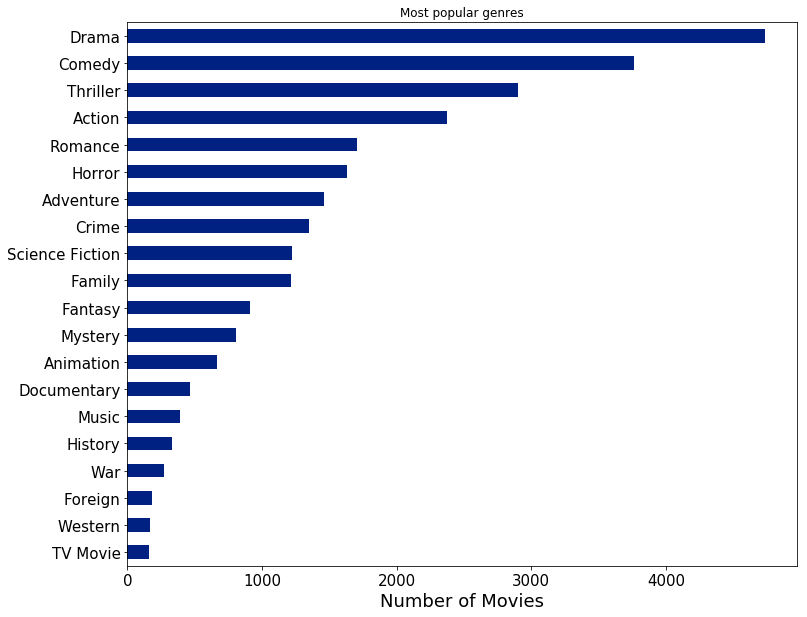

In [26]:
#sort series in ascending order
geners_count.sort_values(ascending = True, inplace = True)

#initializing plot
ax = geners_count.plot.barh(color = '#002082', fontsize = 15)

#giving a title
ax.set(title = 'Most popular genres')

#x-label
ax.set_xlabel('Number of Movies', fontsize = '18')

#giving the figure size(width, height)
ax.figure.set_size_inches(12, 10)

#shwoing the plot
plt.show()



### Research Question 2- Who is the actor that has most movies ?


In [27]:
# Top Actor
cast_count = extract_data('cast')
cast_count.head(3)

Robert De Niro       72
Samuel L. Jackson    71
Bruce Willis         62
dtype: int64

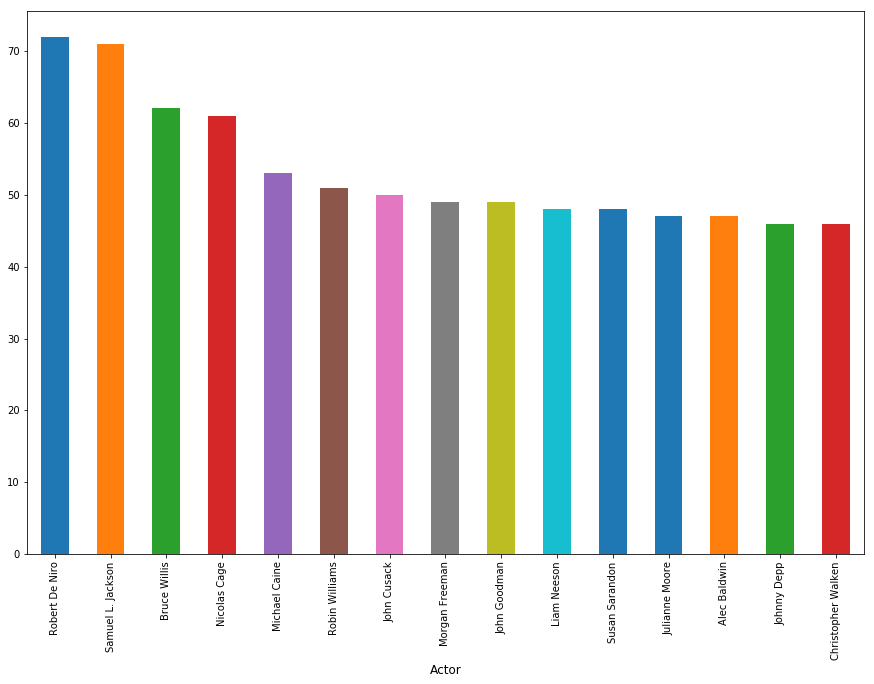

In [28]:
#limit the data to plot it easily
#Plot top 15 
cast_limit=cast_count.head(15)

plot_data(cast_limit,'cast','Actor')

##### *Robert De Niro* has  *72* movies

### Research Question 3- What is the company that produced  most movies?

In [29]:
pc_count = extract_data('production_companies')
pc_count.head(3)

Universal Pictures    522
Warner Bros.          509
Paramount Pictures    431
dtype: int64

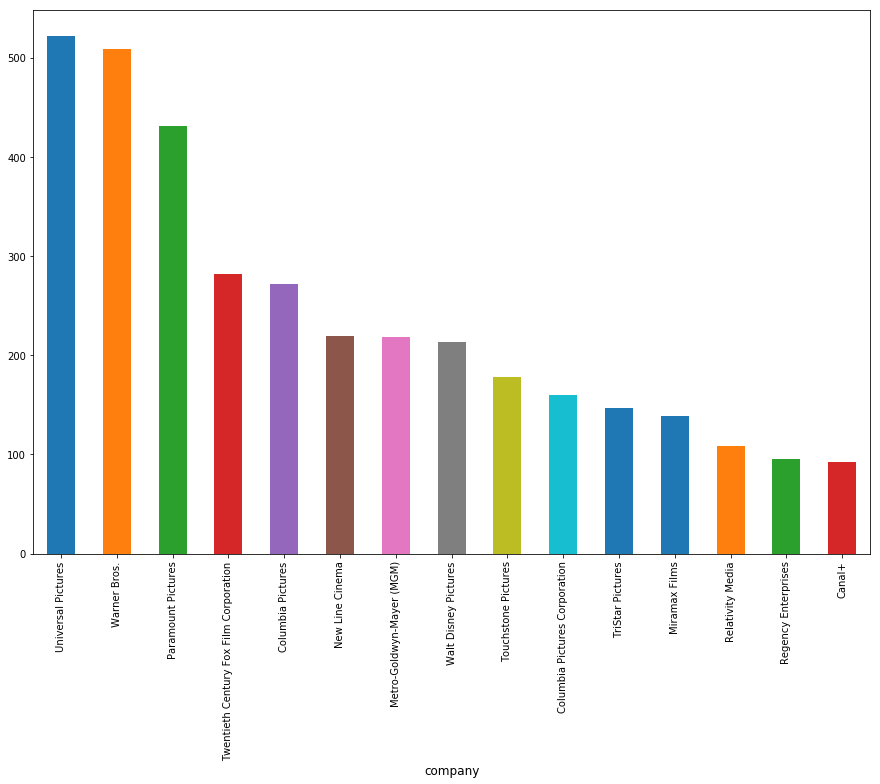

In [30]:
#limit the data to plot it easily
#Plot top 15 
pc_limit=pc_count.head(15)
plot_data(pc_limit,'production_companies','company')

##### *Universal Pictures* produced 522 movies


### Research Question 4- What is the top keyword?

In [31]:
kw_count = extract_data('keywords')
kw_count.head(3)

woman director      405
independent film    393
based on novel      278
dtype: int64

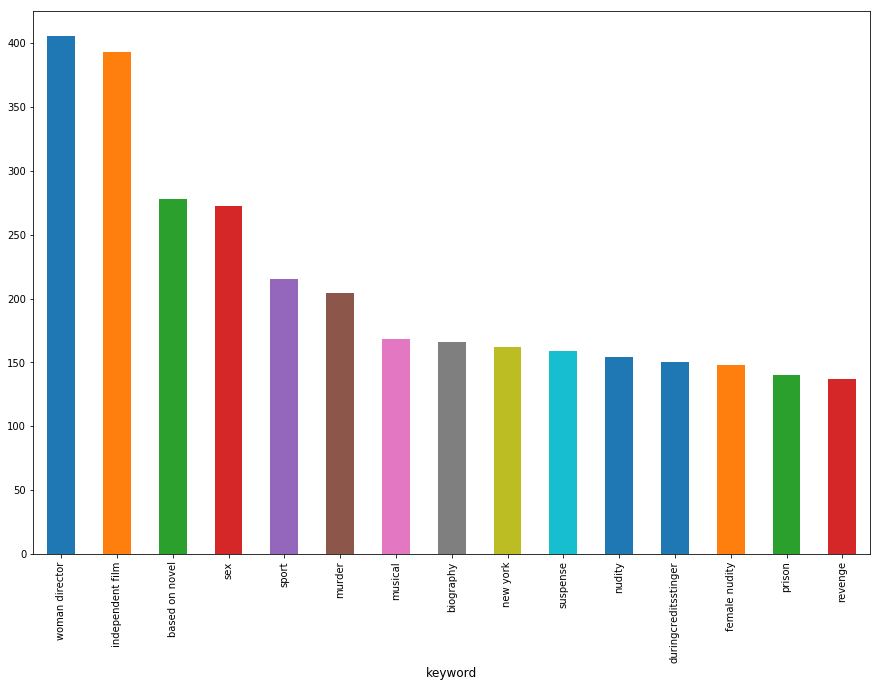

In [32]:
#limit the data to plot it easily
#plot top 15 
kw_limit=kw_count.head(15)
plot_data(kw_limit,'keywords','keyword')

##### keyword *woman director* was serached *405* times


### Research Question 5- Which year has the biggest number of movies?

In [33]:
# count the movies for each year using groupby
Mdf=df.groupby(df['release_year'],as_index=False)['original_title'].count()

# sort the results in ascending order
Mdf.sort_values(ascending = True, inplace = True, by=['original_title'])

# return the year that has the biggest number of movies
Mdf.tail(1)

,release_year,original_title
54,2014,680


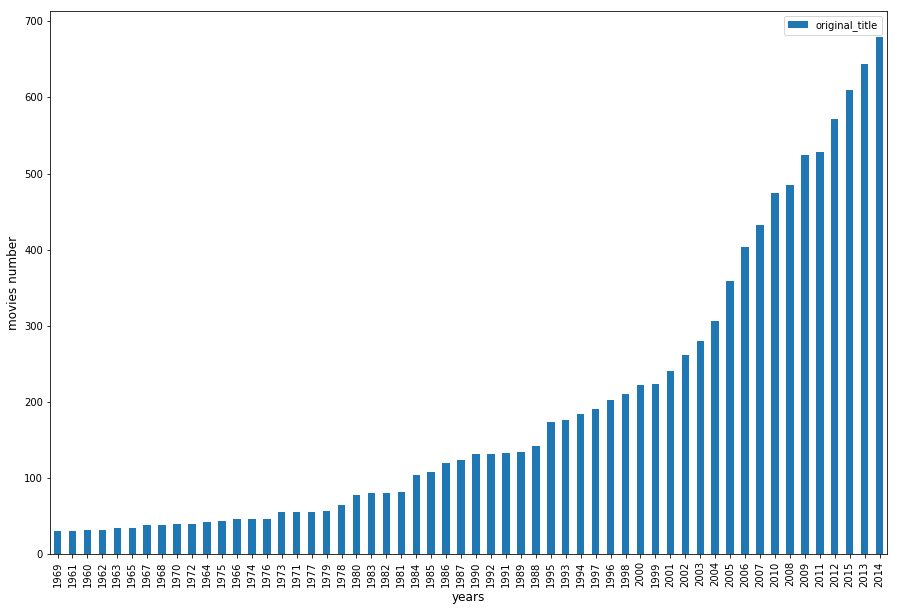

In [35]:
#Plot the data
Mdf.plot(x='release_year',kind='bar',figsize=(15,10)),
plt.xlabel('years',fontsize=12),
plt.ylabel('movies number',fontsize=12);



### Research Question 6- Which director directed most films?

In [36]:
d_count = extract_data('director')
d_count.head(3)

Woody Allen        46
Clint Eastwood     34
Martin Scorsese    30
dtype: int64

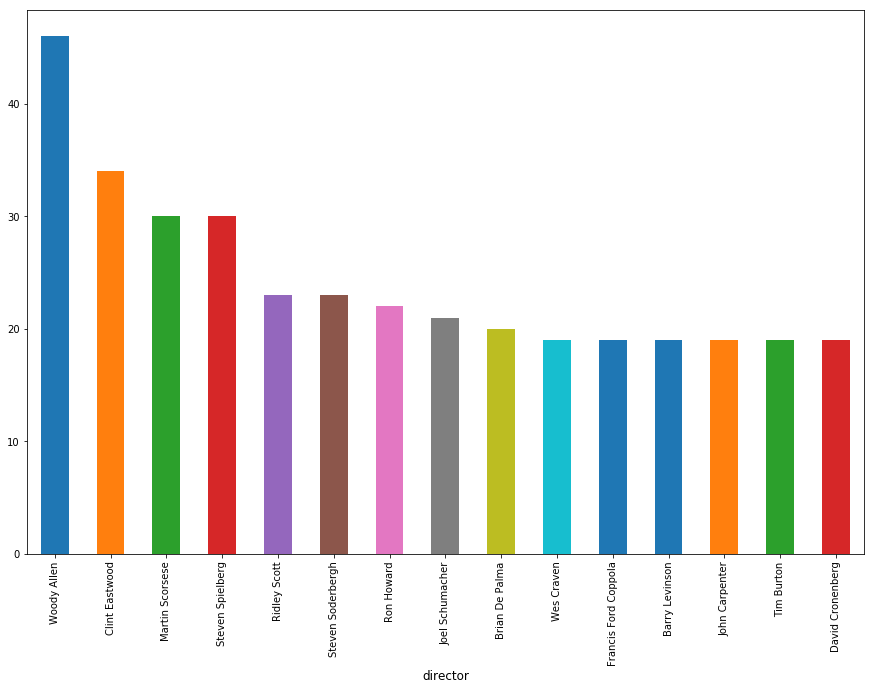

In [37]:
#limit the data to plot it easily
#plot top 15 
d_limit=d_count.head(15)
plot_data(d_limit,'director','director')

##### *Woody Allen*  directed *46* movies

<a id='conclusions'></a>
## Conclusions

After analysing TMDb movie data I have found that audiences prefer to watch drama movies more than comdey movies.

The top actor who played in most movies is Robert De Niro then Samuel L. Jackson.

Universal Pictures produced movies more than any production company.

Audiences like to watch movies directed by women.

Woody Allen directed 40+ movies.

In 2014 there were a 680 movies.
### Limitation
When I analysed categorical data, I just split them one by one, and count them one by one. But there must be some effect when these words combine. For example, the keyword based on *novel is popular*, but what truly keyword that makes the movie sucess maybe the based on *novel&adventure.* 

Units of revenue and budget column: I am not sure that the budgets and revenues all in US dollars? 


In [38]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0